## *Лабораторная работа № 1*
### *«Проверка гипотезы о законе распределения генеральной совокупности»*
В результате опыта была получена выборочная совокупность.

Задание:
1) Составить вариационный ряд.
2) Построить интервальный статистический ряд.
3) По сгруппированным данным построить полигон относительных частот, гистограмму относительных частот.
4) Построить график эмпирической функции распределения.
5) Найти числовые характеристики выборки: выборочное среднее, исправленную выборочную дисперсию, моду, медиану, эксцесс, асимметрию.
6) По виду гистограммы и эмпирической функции распределения выборки выдвинуть гипотезу о распределении генеральной совокупности.
7) Найти оценки параметров предполагаемого распределения генеральной совокупности.
8) Построить на чертеже гистограммы и эмпирической функции её теоретические аналоги f(x) и F(x).
9) Проверить выполнение правила «трех сигма».
10) Применить критерий согласия Пирсона принять или опровергнуть выдвинутую гипотезу о распределении генеральной совокупности.
11) Найти доверительные интервалы для генеральной средней и генерального среднеквадратического отклонения по уровню надежности γ = 0,95.

#### Вариант 14
18,5; 19,0; 20,6; 18,4; 18,3; 19,2 18,5; 20,3; 18,6; 20,6; 18,5; 18,3; 19,1; 21,0; 18,6; 19,1; 18,4; 19,9; 18,7; 19,5; 18,4; 21,6; 18,9; 19,5; 20,1; 19,4; 19,0; 19,2; 19,7; 19,9; 19,5; 20,0; 18,4; 18,3; 19,6; 18,8; 23,1; 19,6; 18,5; 20,7; 18,7; 18,7; 22,8; 18,9; 20,2; 19,0; 19,2; 19,6; 18,9; 20,3; 21,0; 18,9; 20,3; 18,3; 19,5; 18,5;18,5; 18,6; 19,3; 18,6.

In [726]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [727]:
data = [52, 60, 62, 64, 53, 60, 61, 63, 68, 69, 58, 67, 63, 54, 55, 65, 71, 68, 64, 66]
#data = [18.5, 19.0, 20.6, 18.4, 18.3, 19.2, 18.5, 20.3, 18.6, 20.6, 18.5, 18.3, 19.1, 21.0, 18.6, 19.1, 18.4, 19.9, 18.7, 19.5, 18.4, 21.6, 18.9, 19.5, 20.1, 19.4, 19.0, 19.2, 19.7, 19.9, 19.5, 20.0, 18.4, 18.3, 19.6, 18.8, 23.1, 19.6, 18.5, 20.7, 18.7, 18.7, 22.8, 18.9, 20.2, 19.0, 19.2, 19.6, 18.9, 20.3, 21.0, 18.9, 20.3, 18.3, 19.5, 18.5, 18.5, 18.6, 19.3, 18.6]
print(f"Начальная выборка: {data}")

Начальная выборка: [52, 60, 62, 64, 53, 60, 61, 63, 68, 69, 58, 67, 63, 54, 55, 65, 71, 68, 64, 66]


# 1. Составить вариационный ряд

In [728]:
variation_series = sorted(data)
print(f"Вариационный ряд: {variation_series}")

Вариационный ряд: [52, 53, 54, 55, 58, 60, 60, 61, 62, 63, 63, 64, 64, 65, 66, 67, 68, 68, 69, 71]


# 2. Построить интервальный статистический ряд.

In [729]:
n = len(data)
print(f"Объём выборки n = {n}")

Объём выборки n = 20


In [730]:
x_min = min(data)
x_max = max(data)
R = x_max - x_min
R = round(R, 3)
print(x_min)
print(x_max)
print(f"Размах выборки R = {R}")

52
71
Размах выборки R = 19


In [731]:
m = 1 + 3.322 * math.log10(n)
m = math.ceil(m)
print(f"Число интервалов m = {m}")

Число интервалов m = 6


In [732]:
h = R / m
h = math.ceil(h)
print(f"Длина интервала h = {h}")

Длина интервала h = 4


In [733]:
x0 = x_min - h / 2
print(f"Начало первого интервала x0 = {x0}")

Начало первого интервала x0 = 50.0


In [734]:
intervals = [x0 + i * h for i in range(m + 1)]
interval_counts = [0] * m

for value in data:
    for i in range(m):
        if intervals[i] <= value < intervals[i + 1]:
            interval_counts[i] += 1
            break

# Создаем таблицу
interval_table = pd.DataFrame({
    'Интервал': [f"[{intervals[i]:.2f}, {intervals[i + 1]:.2f})" for i in range(m)],
    'ni': interval_counts,
    'ni/n': [count / n for count in interval_counts],
    'ni/(n*h)': [count / (n * h) for count in interval_counts]
})

print("Интервальный статистический ряд:")
print(interval_table)

Интервальный статистический ряд:
         Интервал  ni  ni/n  ni/(n*h)
0  [50.00, 54.00)   2  0.10    0.0250
1  [54.00, 58.00)   2  0.10    0.0250
2  [58.00, 62.00)   4  0.20    0.0500
3  [62.00, 66.00)   6  0.30    0.0750
4  [66.00, 70.00)   5  0.25    0.0625
5  [70.00, 74.00)   1  0.05    0.0125


# 3. По сгруппированным данным построить полигон относительных частот, гистограмму относительных частот

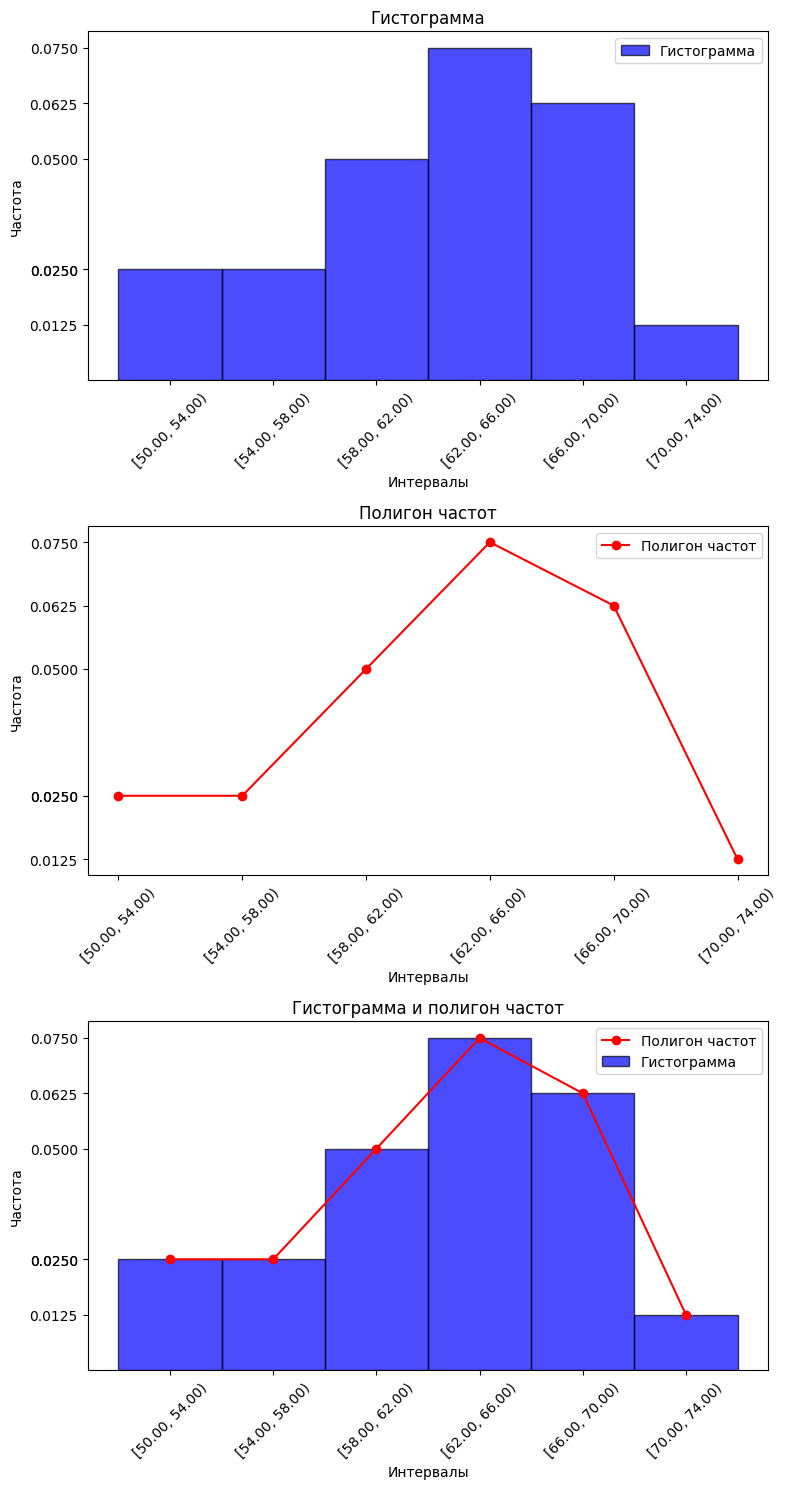

In [735]:
# Находим середины интервалов (числовые значения)
midpoints = [(intervals[i] + intervals[i + 1]) / 2 for i in range(m)]

# Создаем фигуру с тремя подграфиками
fig, axes = plt.subplots(3, 1, figsize=(8, 15))


# Первый график: Гистограмма
axes[0].bar(
    midpoints,  # Числовые значения середин интервалов
    interval_table['ni/(n*h)'],  # Высота столбцов
    width=h,  # Ширина столбцов равна длине интервала
    edgecolor='black',
    alpha=0.7,
    color='blue',
    label='Гистограмма'
    
)
axes[0].set_xticks(midpoints)
axes[0].set_xticklabels([f"[{intervals[i]:.2f}, {intervals[i + 1]:.2f})" for i in range(m)], rotation=45)
axes[0].set_yticks(interval_table['ni/(n*h)'])
axes[0].set_xlabel('Интервалы')
axes[0].set_ylabel('Частота')
axes[0].set_title('Гистограмма')
axes[0].legend()

# Второй график: Полигон частот
axes[1].plot(
    midpoints,  # Числовые значения середин интервалов
    interval_table['ni/(n*h)'],  # Частоты
    marker='o',
    linestyle='-',
    color='red',
    label='Полигон частот'
)
axes[1].set_xticks(midpoints)
axes[1].set_xticklabels([f"[{intervals[i]:.2f}, {intervals[i + 1]:.2f})" for i in range(m)], rotation=45)
axes[1].set_yticks(interval_table['ni/(n*h)'])
axes[1].set_xlabel('Интервалы')
axes[1].set_ylabel('Частота')
axes[1].set_title('Полигон частот')
axes[1].legend()

# Третий график: Гистограмма и полигон частот вместе
axes[2].bar(
    midpoints,  # Числовые значения середин интервалов
    interval_table['ni/(n*h)'],  # Высота столбцов
    width=h,  # Ширина столбцов равна длине интервала
    edgecolor='black',
    alpha=0.7,
    color='blue',
    label='Гистограмма'
)
axes[2].plot(
    midpoints,  # Числовые значения середин интервалов
    interval_table['ni/(n*h)'],  # Частоты
    marker='o',
    linestyle='-',
    color='red',
    label='Полигон частот'
)
axes[2].set_xticks(midpoints)
axes[2].set_xticklabels([f"[{intervals[i]:.2f}, {intervals[i + 1]:.2f})" for i in range(m)], rotation=45)
axes[2].set_yticks(interval_table['ni/(n*h)'])
axes[2].set_xlabel('Интервалы')
axes[2].set_ylabel('Частота')
axes[2].set_title('Гистограмма и полигон частот')
axes[2].legend()

# Настройка отступов между графиками
plt.tight_layout()



# Показываем графики
plt.show()